In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [2]:
X_train = np.loadtxt('input.csv', delimiter=',')
Y_train = np.loadtxt('labels.csv', delimiter=',')

X_test = np.loadtxt('input_test.csv', delimiter=',')
Y_test = np.loadtxt('labels_test.csv', delimiter=',')

In [3]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)
X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)
X_train=X_train/255.0
X_test=X_test/255.0

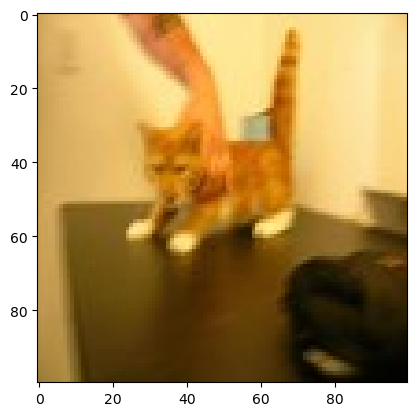

In [32]:
pic = random.randint(0,len(X_train))
plt.imshow(X_train[1000,:])
plt.show()

In [14]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  
])

model.add(Flatten())

In [15]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [16]:
model.fit(X_train, Y_train, epochs = 30, batch_size = 64)

Epoch 1/30
32/32 [==============================] - 8s 223ms/step - loss: 0.7903 - accuracy: 0.4960
Epoch 2/30
32/32 [==============================] - 7s 214ms/step - loss: 0.6793 - accuracy: 0.5740
Epoch 3/30
32/32 [==============================] - 7s 218ms/step - loss: 0.6020 - accuracy: 0.6755
Epoch 4/30
32/32 [==============================] - 9s 268ms/step - loss: 0.5376 - accuracy: 0.7350
Epoch 5/30
32/32 [==============================] - 9s 273ms/step - loss: 0.4786 - accuracy: 0.7735
Epoch 6/30
32/32 [==============================] - 9s 291ms/step - loss: 0.4206 - accuracy: 0.8015
Epoch 7/30
32/32 [==============================] - 11s 332ms/step - loss: 0.3739 - accuracy: 0.8280
Epoch 8/30
32/32 [==============================] - 11s 333ms/step - loss: 0.2799 - accuracy: 0.8885
Epoch 9/30
32/32 [==============================] - 9s 292ms/step - loss: 0.2360 - accuracy: 0.9085
Epoch 10/30
32/32 [==============================] - 10s 321ms/step - loss: 0.1802 - accuracy: 0.9

In [17]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 32ms/step - loss: 1.7432 - accuracy: 0.6675


[1.7431540489196777, 0.6675000190734863]

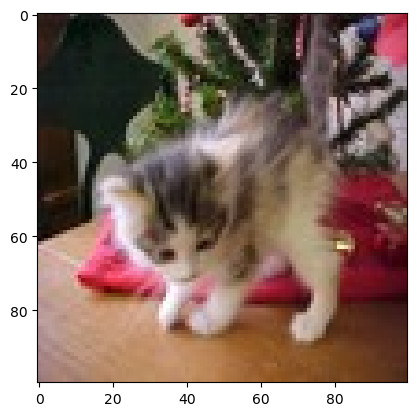

1/1 [==============================] - 0s 13ms/step
Our model says it is a : cat
1


In [30]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)
print(int(y_pred))